<a href="https://www.kaggle.com/code/janasoliman21/last-task-classification?scriptVersionId=209831698" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

2024-11-27 01:33:25.235660: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-27 01:33:25.235833: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-27 01:33:25.406375: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. Loading The Dataset

### Notice that we've changed the order of the data

In [2]:
dataC = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv", encoding = "ISO-8859-1")
dataC = dataC.sample(n = len(dataC), random_state = 250)
dataC.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
10,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,33.88,123.80,1150.0,0.11810,0.15510,0.1459,0.09975,0.2948,0.08452,NaN
508,915452,B,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,...,17.76,109.80,928.2,0.13540,0.13610,0.1947,0.13570,0.2300,0.07230,NaN
482,912519,B,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,...,18.32,94.94,660.2,0.13930,0.24990,0.1848,0.13350,0.3227,0.09326,NaN
149,869931,B,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,...,22.46,97.19,725.9,0.09711,0.18240,0.1564,0.06019,0.2350,0.07014,NaN
67,859465,B,11.31,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,...,23.84,78.00,466.7,0.12900,0.09148,0.1444,0.06961,0.2400,0.06641,NaN


### Getting the dataset info is a good practice !

In [3]:
dataC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 10 to 218
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             569 n

# 3. Data Preprocessing

### Drop what u won't need

In [4]:
dataC.drop(columns = ['id', 'Unnamed: 32'], inplace = True)
dataC.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.1459,0.09975,0.2948,0.08452
508,B,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,...,17.32,17.76,109.80,928.2,0.13540,0.13610,0.1947,0.13570,0.2300,0.07230
482,B,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,...,14.83,18.32,94.94,660.2,0.13930,0.24990,0.1848,0.13350,0.3227,0.09326
149,B,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,...,15.34,22.46,97.19,725.9,0.09711,0.18240,0.1564,0.06019,0.2350,0.07014
67,B,11.31,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,...,12.33,23.84,78.00,466.7,0.12900,0.09148,0.1444,0.06961,0.2400,0.06641


### Notice that 'diagnosis' column is from type object

* To solve this problem u need to transform it into numbers
* The best solution is to transform it into zeros and ones

In [5]:
le = LabelEncoder()
dataC['diagnosis'] = le.fit_transform(dataC['diagnosis'])
dataC['diagnosis'].unique()

array([1, 0])

### Let's look at the data again !

In [6]:
dataC.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.1459,0.09975,0.2948,0.08452
508,0,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,...,17.32,17.76,109.80,928.2,0.13540,0.13610,0.1947,0.13570,0.2300,0.07230
482,0,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,...,14.83,18.32,94.94,660.2,0.13930,0.24990,0.1848,0.13350,0.3227,0.09326
149,0,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,...,15.34,22.46,97.19,725.9,0.09711,0.18240,0.1564,0.06019,0.2350,0.07014
67,0,11.31,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,...,12.33,23.84,78.00,466.7,0.12900,0.09148,0.1444,0.06961,0.2400,0.06641


### Prepare ur features (x) and labels (y)

In [7]:
x = dataC.drop(columns = ['diagnosis'])
y = dataC[['diagnosis']]

### Checking their shapes is a good practice to solve many problems to come 

In [8]:
print(y.shape)
print(x.shape)

(569, 1)
(569, 30)


### Normalize ur features and labels

This step makes a huge difference in ur models accuracy !

In [9]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

### Split ur features and labels

This step helps to save some data without training the model on it

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# 4. Create Your Models

## 1. The ANN Model

### Creating the Model (Model Structure)

In [11]:
modelANN_classification = Sequential([
                                         Dense(10, activation = 'relu', input_dim = 30),
                                         Dense(15, activation = 'relu'),
                                         Dense(1, activation = 'linear')
                                     ])
modelANN_classification.compile(optimizer = 'adam', loss = 'mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Checking on it

In [12]:
modelANN_classification.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

### Training it

In [13]:
history = modelANN_classification.fit(x_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2011 - val_loss: 0.1141
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1400 - val_loss: 0.1108
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1356 - val_loss: 0.1044
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1242 - val_loss: 0.0935
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1177 - val_loss: 0.0844
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1032 - val_loss: 0.0731
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0873 - val_loss: 0.0624
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0792 - val_loss: 0.0567
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0806 - val_loss: 0.0574
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0765 - val_loss: 0.0553
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0649 - val_loss: 0.0580
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

### Plotting its results

In [14]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']

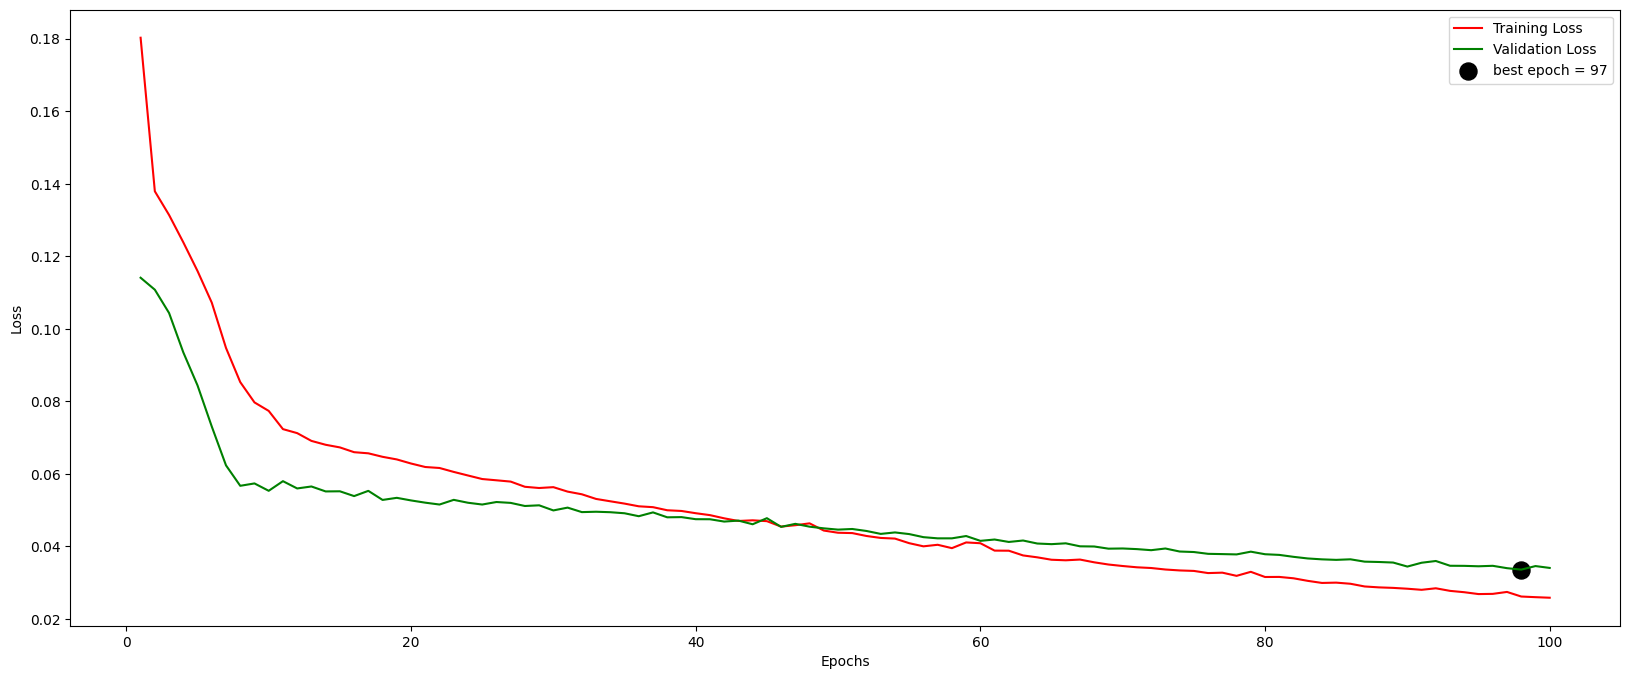

In [15]:
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i + 1 for i in range(len(tr_loss))]

loss_label = f"best epoch = {index_loss}"

plt.figure(figsize = (20, 8))

plt.plot(Epochs, tr_loss, "r", label = "Training Loss")
plt.plot(Epochs, val_loss, "g", label = "Validation Loss")

plt.scatter(index_loss + 1, val_lowest, c = "black", s = 150, label = loss_label)

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

### Prediction

In [16]:
y_hatANN = modelANN_classification.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


### Error Rate

In [17]:
print(mean_squared_error(y_test, y_hatANN))

0.04153383160736112


### Models Score

In [18]:
print(r2_score(y_test, y_hatANN))

0.8202884329637694


## 2. KNN Model

### Creating the Model

In [19]:
modelKNN_classification = KNeighborsClassifier(n_neighbors = 9, metric = 'l2')

### Training it

In [20]:
modelKNN_classification.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='l2', n_neighbors=9)

### Prediction

In [21]:
y_hatKNN = modelKNN_classification.predict(x_test)

### Model's Score

In [22]:
accuracy_score(y_test, y_hatKNN)

0.9649122807017544

## 3. Logistic Regression

### Creating the model

In [23]:
modelRegression_classification = LogisticRegression()

### Training it

In [24]:
modelRegression_classification.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Prediction

In [25]:
y_hatRegression = modelRegression_classification.predict(x_test)

### Creating the Confusion Matrix

In [26]:
cf_matrix = confusion_matrix(y_test, y_hatRegression)
cf_matrix

array([[108,   1],
       [  9,  53]])

### Visualizing the Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label')

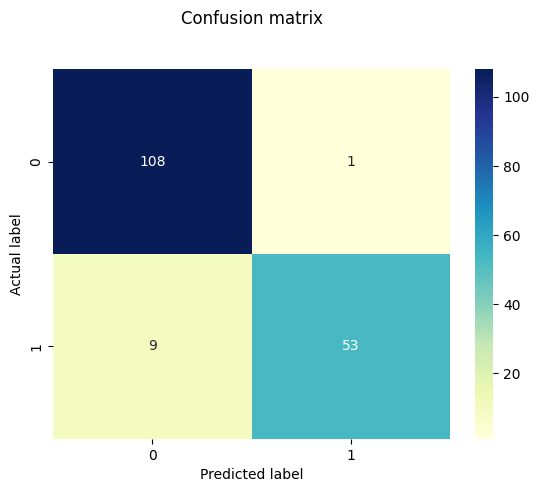

In [27]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Model's Score

In [28]:
accuracy_score(y_test, y_hatRegression)

0.9415204678362573